In [1]:
import argparse
import numpy as np
import os
import os.path as osp
import pandas as pd
import torch
import torch.nn.functional as F
import tqdm
import matplotlib.pyplot as plt

['0.pt', '1.pt', '2.pt', '3.pt', '4.pt']
tensor(0.) tensor(0.0644)
torch.Size([1, 512, 512])


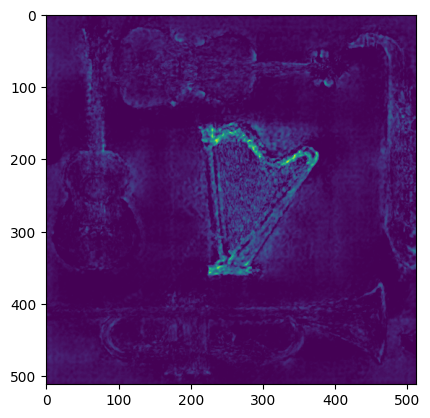

tensor(0.) tensor(0.1330)
torch.Size([1, 512, 512])


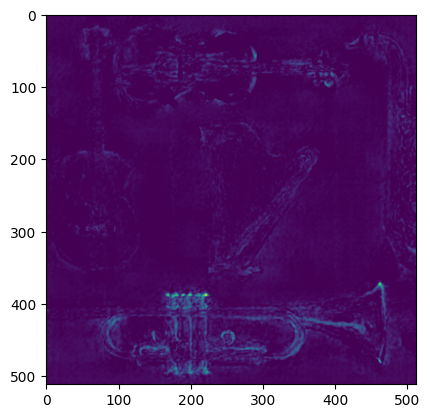

tensor(0.) tensor(0.0529)
torch.Size([1, 512, 512])


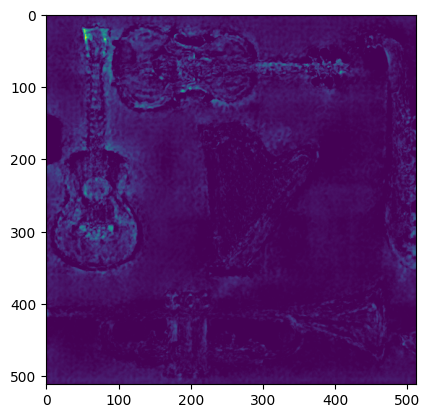

tensor(0.) tensor(0.1492)
torch.Size([1, 512, 512])


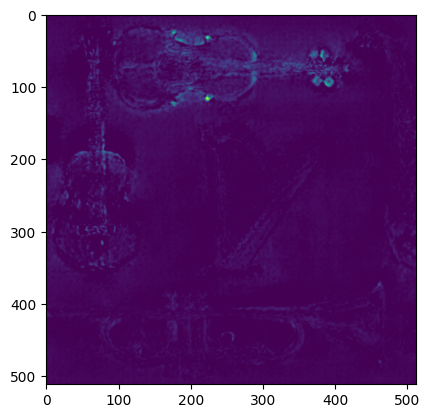

In [32]:
base_dir = "C:\\Users\\Cole\\Desktop\\diffusion-localization\\data\\custom_img_instuments_all_labels\\v2-0_1trials_1keep_100samples"
heatmap_files = os.listdir(base_dir)
print(heatmap_files)

imgs = []
for heatmap_file in heatmap_files: 
    img = torch.load(osp.join(base_dir, heatmap_file))
    imgs.append(img)
    
rel = torch.nn.ReLU()
for i in range(1, len(heatmap_files)):
    img = imgs[0] - imgs[i]
    img = rel(img)
    img = img.sum(dim=0).unsqueeze(dim=0)
    print(img.min(), img.max())
    
    img = img / img.max()
    print(img.shape)
    plt.imshow(img.permute(1, 2, 0))
    plt.show()

torch.Size([1, 512, 512])
torch.Size([3, 512, 512])


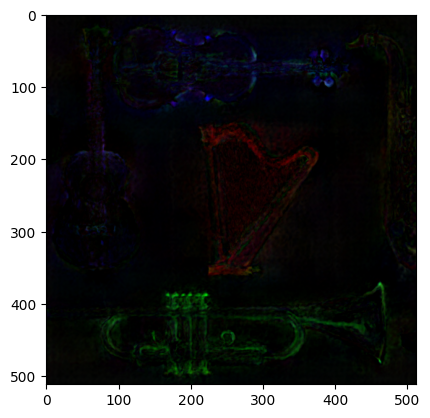

In [40]:
test_imgs = []
for i in [1, 2, 4]:
    img = imgs[0] - imgs[i]
    img = rel(img)
    img = img.sum(dim=0).unsqueeze(dim=0)
    test_imgs.append(img)
    
print(test_imgs[0].shape)
img = torch.stack(test_imgs)
img = img.squeeze()
print(img.shape)
img = img / img.max()
plt.imshow(img.permute(1, 2, 0))
plt.show()